In [1]:
# Import the necessary packages and libraries #
import scipy
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import numpy.matlib
import pandas 
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
import tensorflow
from tensorflow import keras 
import os
from sklearn.neighbors import DistanceMetric

In [2]:
# Sets the precision of the data in the Pandas Dataframes 

pandas.set_option("precision", 10)

In [3]:
# Removes any Tensorflow warnings 

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
# Import the MatLab data #

matlabData = sio.loadmat(file_name='./data/s2_sl2p_uniform_10_replicates_sobol_prosail_inout.mat', variable_names=['Input', 'Output'])

In [5]:
# Extract the input and output data #

bands = pandas.DataFrame(data=matlabData['Input']['Rho_Toc'][0][0])
angles = pandas.DataFrame(data=matlabData['Input']['Angles'][0][0])
LAI = pandas.Series(data=matlabData['Output']['LAI'][0][0].flatten())
FAPAR = pandas.Series(data=matlabData['Output']['FAPAR'][0][0].flatten())
FCOVER = pandas.Series(data=matlabData['Output']['FCOVER'][0][0].flatten())

In [6]:
# Standardize the calibration data #

cal_data = pandas.concat([bands, angles, LAI, FAPAR, FCOVER], axis=1, join='outer')

cal_data.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER']

cal_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER
0,0.1312746755,0.0743505601,0.1729546392,0.2952160738,0.3209243927,0.3303722287,0.1873586099,0.1113007554,0.9638065534,0.5275411500,-0.5752876765,1,0.4391203617,0.4803244610
1,0.1019407701,0.0868185076,0.1599851769,0.3680334831,0.4389734403,0.4759755142,0.3043390179,0.1996883219,0.9995852344,0.5284670738,-0.4777431279,1,0.5296906764,0.5338211214
2,0.0577228876,0.0543735427,0.0726863963,0.1146353863,0.1262129829,0.1300015294,0.1048168652,0.0853760008,0.9807097061,0.6843199822,0.6909005295,1,0.2406051357,0.2324486617
3,0.0608335819,0.0423475494,0.0917885392,0.1738484853,0.1980468499,0.2153382831,0.1396374825,0.0906137034,0.9865515976,0.7869673865,0.8590635747,1,0.3515168619,0.3732491055
4,0.0789422177,0.1359804109,0.1677317262,0.2554469658,0.2962514793,0.3108466204,0.3167107908,0.2088934617,0.9999190888,0.8237423248,-0.9085753290,1,0.2890892994,0.2565897729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,0.0642385315,0.0276301255,0.0866383370,0.3106952678,0.4255780128,0.4466691326,0.1173674161,0.0414608341,0.9641458993,0.8501574022,-0.9266152189,10,0.9454688738,0.9530549586
122876,0.0913131658,0.0504649365,0.1222839075,0.3081750760,0.4047671458,0.4293059492,0.1725548796,0.1005631041,0.9616583754,0.8710934328,0.9265827175,10,0.8085248415,0.8034524935
122877,0.0621419307,0.0380236717,0.0921177459,0.2614424931,0.3577263614,0.3626203975,0.1294881968,0.0624406803,0.9757927762,0.8637999983,-0.9813994186,10,0.8185069725,0.8122050332
122878,0.0514800307,0.0288523379,0.0690024543,0.4158467721,0.6343113015,0.6354447032,0.1810943898,0.0474550174,0.9606931097,0.8268533675,-0.8694016324,10,0.9810850825,0.9992241257


In [7]:
# Standardize the calibration data #

cal_data_scaled = pandas.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(cal_data))

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER']

cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598
122876,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081
122877,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201
122878,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430


In [8]:
# Create subset id's #

rep = 10

subsets = numpy.arange(0, int(cal_data_scaled.shape[0]/10))

subset_ids = numpy.matlib.repmat(subsets, 1, rep)

cal_data_scaled['subset_id'] = subset_ids[0]

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'subset_id']

cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283
122876,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284
122877,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285
122878,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286


In [9]:
# Sample data to create reference database # 

ref_data = cal_data_scaled.sample(n=100, ignore_index=False)

ref_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id
77823,0.3745746659,-0.5702053206,0.3043555191,1.2725359796,1.3594486911,1.2573201672,1.0615355676,0.3213279865,1.1422701529,-1.0608223339,-0.7153444727,0.5222329679,0.8165604088,0.8279683790,4095
105369,-0.1958415749,-0.5379226712,-0.1870033394,0.7679982714,0.8633038757,0.9285534229,-0.1543962214,-0.7833374257,0.5945456531,0.8612055316,1.2807914273,1.2185435917,0.8787731466,0.8717763159,7065
69700,-1.0795276119,0.4026328886,-0.7316405348,-1.3659228682,-1.2784405172,-1.3522767794,-1.1327496746,-0.5214946188,1.2901096882,-0.9544463438,-0.8453008726,0.1740776560,-0.7618882865,-0.8937280884,8260
22122,-0.7164630232,0.8001034292,-0.2910415055,-0.5031526407,-0.5601171997,-0.5369651682,-0.0922947337,-0.1326217846,-1.5283559867,0.4608699762,-1.0691694014,-1.2185435917,-0.6051099610,-0.6177805961,9834
27330,-0.8292725791,-0.6723669283,-0.8582760038,-0.3471650744,-0.4082575142,-0.4306203521,-1.0175476113,-1.1300363117,-0.7294434885,-0.7509776453,0.7215705375,-0.8703882798,0.1746569164,0.2178660771,2754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38866,-1.0318830755,-0.3251490068,-1.0888874077,-1.3557713298,-1.2630086218,-1.2959929446,-0.7179663706,-0.2863851398,0.9634015744,-2.2415474722,-0.7482503988,-0.5222329679,-0.7803955899,-0.8300473370,2002
94252,-0.0482158373,-0.6937567527,-0.0632674743,0.4956928554,0.6788742637,0.8180205788,-0.0805525375,-0.4787315664,0.6414788180,-2.1181626250,0.5507679501,0.8703882798,0.8074976738,0.7910440160,8236
46632,0.1386908607,-0.3288439845,0.1533004719,1.1507224737,1.3371780453,1.3345686869,2.0637463047,1.5145994369,-0.9047538583,-0.0620588673,0.9632492627,-0.5222329679,0.5432906906,0.5465738342,9768
110109,-1.3052524962,-0.9449372703,-1.4203931594,-1.2183883843,-0.7442110012,-0.8628766881,-1.4679423077,-1.1035734113,0.4574213577,1.3354833601,-1.3004633504,1.2185435917,0.3200085994,0.2358076518,11805


In [10]:
# List of indices to remove from the calibration database #

index_list = ref_data.index.values

In [11]:
# Resets the indices in the reference data so that they start from zero

ref_data = ref_data.reset_index(drop=True)

In [12]:
# Removes the indices from calibration database that are in the reference database #

cal_data_scaled = cal_data_scaled.drop(index_list)

In [13]:
# Resets the indices in the calibration data so that they start from zero

cal_data_scaled = cal_data_scaled.reset_index(drop=True)

In [14]:
# Creates the training and validation sets from the calibration data

features_training, features_valid = sklearn.model_selection.train_test_split(cal_data_scaled, test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=None)

In [15]:
# Resets the indices in the training data so that they start from zero

features_training = features_training.reset_index(drop=True)

In [16]:
# Resets the indices in the validation data so that they start from zero

features_valid = features_valid.reset_index(drop=True)

In [17]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for training

LAI_feature_training = features_training['LAI']
FAPAR_feature_training = features_training['FAPAR']
FCOVER_feature_training = features_training['FCOVER']

In [18]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for validation

LAI_feature_valid = features_valid['LAI']
FAPAR_feature_valid = features_valid['FAPAR']
FCOVER_feature_valid = features_valid['FCOVER']

In [19]:
# Removes that isn't needed for training and validation 
features_training = features_training.drop(['LAI', 'FAPAR', 'FCOVER','subset_id'], axis=1)
features_valid = features_valid.drop(['LAI', 'FAPAR', 'FCOVER','subset_id'], axis=1)

In [20]:
# Creates a model for LAI, FAPAR, and FCOVER using LARs regression 

LAI_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
LAI_feature_model = LAI_feature_model.fit(features_training, LAI_feature_training)

FAPAR_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FAPAR_feature_model = FAPAR_feature_model.fit(features_training, FAPAR_feature_training)

FCOVER_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=3)
FCOVER_feature_model = FCOVER_feature_model.fit(features_training, FCOVER_feature_training)

In [21]:
# Makes predictions on the validation data using the LARS models

LAI_feature_predicted = pandas.Series(LAI_feature_model.predict(features_valid))
FAPAR_feature_predicted = pandas.Series(FAPAR_feature_model.predict(features_valid))
FCOVER_feature_predicted = pandas.Series(FCOVER_feature_model.predict(features_valid))

In [22]:
# Extracts the features from the LARS Model

LAI_features = numpy.nonzero(LAI_feature_model.coef_)[0]
FAPAR_features = numpy.nonzero(FAPAR_feature_model.coef_)[0]
FCOVER_features = numpy.nonzero(FCOVER_feature_model.coef_)[0]

LAI_features = features_valid.columns[LAI_features]
print(LAI_features)
FAPAR_features = features_valid.columns[FAPAR_features]
print(FAPAR_features)
FCOVER_features = features_valid.columns[FCOVER_features]
print(FCOVER_features)

Index(['B1', 'B5', 'B6', 'B7'], dtype='object')
Index(['B1', 'B2', 'B5', 'B7'], dtype='object')
Index(['B1', 'B5', 'B7'], dtype='object')


In [23]:
# Creates arrays containing the calibration and reference data 

ref_array = numpy.array(ref_data[LAI_features])

cal_array = numpy.array(cal_data_scaled[LAI_features])

In [24]:
# Calls function from sci-kit learn for calculating the euclidean distance 

dist = DistanceMetric.get_metric('euclidean')

In [25]:
# Calculates the probability for each sample in the calibration data

probs = numpy.exp(-numpy.amin(dist.pairwise(cal_array,ref_array),1))

In [26]:
# Initialize the probability column in the calibration database #

cal_data_scaled['prob'] = probs 

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'subset_id', 'prob']

In [27]:
cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.4778303687
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.2739838378
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.4585353239
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.5695432660
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.5382498575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.8400494130
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.6189554691
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.7118005273
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.8541087010


In [28]:
# Function to normalize the probabilities 

def normalize(data):
    sum_prob = sum(data['prob'])
    data['prob'] = data['prob']/sum_prob
    return data

In [29]:
normalize(cal_data_scaled)

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.0000058345
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.0000033455
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.0000055989
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.0000069544
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.0000065723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.0000102574
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.0000075577
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.0000086914
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.0000104291


In [30]:
# Initialize the probability column in the calibration database #

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'subset_id', 'prob']

In [31]:
# Assign max probability in each subset to every member of that subset 

cal_data_scaled['prob'] = cal_data_scaled.groupby('subset_id')['prob'].transform('max')

In [32]:
normalize(cal_data_scaled)

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.0000065941
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.0000088957
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.0000082910
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.0000086785
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.0000084643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.0000084275
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.0000067548
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.0000080092
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.0000085685


In [33]:
# Find median probability 

median_prob = numpy.median(cal_data_scaled['prob'])

print(median_prob)

8.273684277508066e-06


In [34]:
# Set weight that are below the median to zero 

cal_data_scaled['prob'] = cal_data_scaled['prob'].where(cal_data_scaled['prob'] > median_prob, 0.0)

In [35]:
cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.0000000000
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.0000088957
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.0000082910
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.0000086785
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.0000084643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.0000084275
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.0000000000
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.0000000000
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.0000085685


In [36]:
# Creates the training and validation sets from the calibration data

training_data, valid_data = sklearn.model_selection.train_test_split(cal_data_scaled, test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=None)

In [37]:
# Resets the indices in the training data so that they start from zero

training_data = training_data.reset_index(drop=True)

In [38]:
# Resets the indices in the validation data so that they start from zero

valid_data = valid_data.reset_index(drop=True)

In [39]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for training

LAI_training = training_data['LAI']
FAPAR_training = training_data['FAPAR']
FCOVER_training = training_data['FCOVER']

In [40]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for validation

LAI_valid = valid_data['LAI']
FAPAR_valid = valid_data['FAPAR']
FCOVER_valid = valid_data['FCOVER']

In [41]:
# Extracts the probabilites for training and validation 

training_weights = numpy.array(training_data['prob'])
valid_weights = numpy.array(valid_data['prob'])

In [42]:
gee = ['cosVZA', 'cosSZA', 'cosRAA', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12']
MatLab = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3']
#MatLab = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
LAI_inputs = ['B3','B4', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12','cosVZA', 'cosSZA', 'cosRAA']

In [43]:
# Removes that isn't needed for training and validation 
# Explicitly subset the inputs
training_data = training_data[MatLab]
valid_data = valid_data[MatLab]
test_data = ref_data[MatLab]

In [44]:
test_data

,B0,B1,B2,B3,B4,B5,B6,B7
0,0.3745746659,-0.5702053206,0.3043555191,1.2725359796,1.3594486911,1.2573201672,1.0615355676,0.3213279865
1,-0.1958415749,-0.5379226712,-0.1870033394,0.7679982714,0.8633038757,0.9285534229,-0.1543962214,-0.7833374257
2,-1.0795276119,0.4026328886,-0.7316405348,-1.3659228682,-1.2784405172,-1.3522767794,-1.1327496746,-0.5214946188
3,-0.7164630232,0.8001034292,-0.2910415055,-0.5031526407,-0.5601171997,-0.5369651682,-0.0922947337,-0.1326217846
4,-0.8292725791,-0.6723669283,-0.8582760038,-0.3471650744,-0.4082575142,-0.4306203521,-1.0175476113,-1.1300363117
...,...,...,...,...,...,...,...,...
95,-1.0318830755,-0.3251490068,-1.0888874077,-1.3557713298,-1.2630086218,-1.2959929446,-0.7179663706,-0.2863851398
96,-0.0482158373,-0.6937567527,-0.0632674743,0.4956928554,0.6788742637,0.8180205788,-0.0805525375,-0.4787315664
97,0.1386908607,-0.3288439845,0.1533004719,1.1507224737,1.3371780453,1.3345686869,2.0637463047,1.5145994369
98,-1.3052524962,-0.9449372703,-1.4203931594,-1.2183883843,-0.7442110012,-0.8628766881,-1.4679423077,-1.1035734113


In [45]:
training_data

,B0,B1,B2,B3,B4,B5,B6,B7
0,-0.7186002411,-0.7016678735,-0.8029807830,0.2442807915,0.4918996926,0.3725936119,-0.5399666226,-0.9643681612
1,0.1934384888,-0.1462106887,0.1087619630,0.6716289572,0.5832564882,0.4799774098,0.1520394033,-0.2357074798
2,-0.7425015997,-0.6613040839,-0.7721107688,0.2201593252,0.5751079872,0.6937657249,-0.2279006888,-0.7376372012
3,0.8449712871,-0.3946420343,0.8509754300,1.3018633597,1.1255200687,1.1640873334,0.0836927389,-0.5620880583
4,0.6935870969,-0.1359598567,0.7100972974,0.6472084082,0.2472770631,0.2106411857,-0.9747874814,-1.0114849761
...,...,...,...,...,...,...,...,...
85941,-1.5655452166,-0.9882671019,-1.6580886747,-1.6842537866,-1.2483658705,-1.1284890683,-1.1042690759,-0.7799616582
85942,0.2168001155,1.8532151212,0.0368385856,-1.2060035761,-1.3914397300,-1.4369680337,-0.8104686201,0.4544069144
85943,-0.8034467832,-0.6361700382,-0.8689831890,0.4950780446,1.0415737159,1.0312206925,0.3122141154,-0.3955786273
85944,-0.0995175635,-0.5774696995,-0.2660081891,-0.4488226881,-0.4713621066,-0.5465579986,-1.6442790685,-1.2165212969


In [46]:
LAI_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [47]:
# Creation of the Neural Network models for LAI, FAPAR, and FCOVER 

LAI_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

LAI_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

In [48]:
# Runs NN Model for LAI

LAI_history = LAI_model.fit(x = numpy.array(training_data), y = numpy.array(LAI_training), 
                            sample_weight = training_weights,
                            epochs = 120,
                            validation_data = (numpy.array(valid_data), numpy.array(LAI_valid), valid_weights),
                            callbacks=[LAI_callback]
                           )

Train on 85946 samples, validate on 36834 samples
Epoch 1/120
85946/85946 [==============================] - 14s 164us/sample - loss: 1.1708e-06 - mse: 0.3079 - mae: 0.4327 - val_loss: 7.6439e-07 - val_mse: 0.1868 - val_mae: 0.3371
Epoch 2/120
85946/85946 [==============================] - 11s 129us/sample - loss: 6.7323e-07 - mse: 0.1713 - mae: 0.3175 - val_loss: 6.5577e-07 - val_mse: 0.1599 - val_mae: 0.3092
Epoch 3/120
85946/85946 [==============================] - 11s 126us/sample - loss: 6.1580e-07 - mse: 0.1542 - mae: 0.3009 - val_loss: 6.1084e-07 - val_mse: 0.1497 - val_mae: 0.2959
Epoch 4/120
85946/85946 [==============================] - 12s 137us/sample - loss: 5.8519e-07 - mse: 0.1454 - mae: 0.2920 - val_loss: 5.7947e-07 - val_mse: 0.1399 - val_mae: 0.2875
Epoch 5/120
85946/85946 [==============================] - 11s 132us/sample - loss: 5.6078e-07 - mse: 0.1392 - mae: 0.2856 - val_loss: 5.6261e-07 - val_mse: 0.1374 - val_mae: 0.2824
Epoch 6/120
85946/85946 [===============

In [49]:
#LAI_model.save('./models/LAI_models_no_angles')

In [50]:
print(max(cal_data_scaled['A1']))
print(min(cal_data_scaled['A1']))

1.3485388024357525
-2.1061824803859754


In [51]:
print(max(cal_data_scaled['A2']))
print(min(cal_data_scaled['A2']))

1.3984151512355845
-2.482717431098018


In [52]:
print(max(cal_data_scaled['A3']))
print(min(cal_data_scaled['A3']))

1.2846023306530838
-1.336023951152343


In [53]:
# Makes predictions on the validation data

LAI_predictions = pandas.Series(LAI_model.predict(numpy.array(test_data)).flatten())

In [54]:
# Function that creates the density plots 

def plotting_function(var, input_var, resp_var, title, xlabel, ylabel, alg, ax=None):
    ax = ax
    input_var = input_var*cal_data[var].std() + cal_data[var].mean()
    resp_var = resp_var*cal_data[var].std() + cal_data[var].mean()
    xy = numpy.vstack([input_var, resp_var])
    z = scipy.stats.gaussian_kde(xy)(xy)
    idx = z.argsort()
    x = input_var[idx]
    y = resp_var[idx]
    z = z[idx]
    rmse = sklearn.metrics.mean_squared_error(x, y, squared=False)
    r_sqr = sklearn.metrics.r2_score(x, y)
    ax.scatter(x, y, c = z)
    plt.colorbar(mappable=ax.scatter(x, y, c = z), ax=ax)
    ax.set_title(title + '-' + alg + ' - RMSE: {}'.format(rmse) + ' - $R^2$: {}'.format(r_sqr))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [57]:
LAI_test = ref_data['LAI']

Text(0.5, 0.98, 'Predict on Random Testing Set')

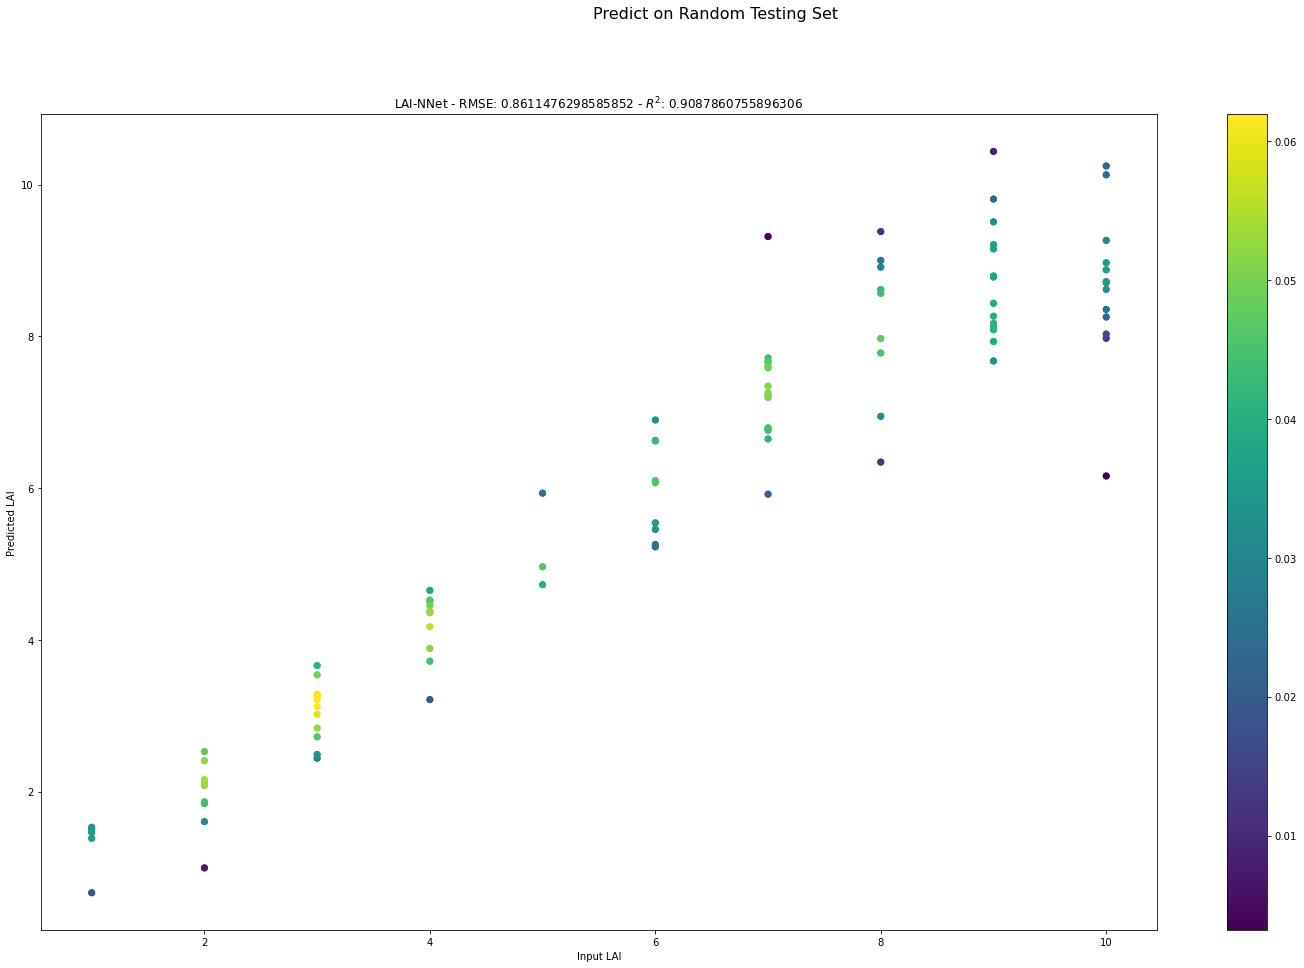

In [59]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,15))

plotting_function('LAI', LAI_test, LAI_predictions, 'LAI','Input LAI','Predicted LAI','NNet', ax1)
  
fig.suptitle('Predict on Random Testing Set', fontsize=16)